# Task 1: Housing Price Prediction using Linear Regression

## Objective
The real estate industry heavily relies on predictive analytics to estimate housing prices based on various factors such as location, property size, age, and amenities. Machine learning models help in understanding these patterns and making data-driven decisions.

In this notebook, we will:
1. Load and explore the housing prices dataset
2. Build a predictive model using regression techniques
3. Analyze the coefficients and their significance
4. Create residual plots to evaluate model assumptions
5. Answer the assignment questions

### Dataset Features:
- **Square_Feet**: Size of the house in square feet
- **Num_Bedrooms**: Number of bedrooms
- **Num_Bathrooms**: Number of bathrooms
- **Age_of_House**: Age of the house in years
- **House_Price**: Target variable (price of the house)

---
## 1. Import Required Libraries

In [31]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Statistical analysis
import statsmodels.api as sm
from scipy import stats
from statsmodels.nonparametric.smoothers_lowess import lowess

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")

All libraries imported successfully!


---
## 2. Load and Explore the Dataset

In [32]:
# Load the housing prices dataset
df = pd.read_excel('../Task_1_Assets/housing_prices.xlsx')

# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nShape of dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn names: {df.columns.tolist()}")
print("\n" + "="*60)
print("FIRST 10 ROWS")
print("="*60)
df.head(10)

DATASET OVERVIEW

Shape of dataset: 500 rows, 5 columns

Column names: ['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_House', 'House_Price']

FIRST 10 ROWS


,Square_Feet,Num_Bedrooms,Num_Bathrooms,Age_of_House,House_Price
0,1660,1,2,38,7.698993e+05
1,4572,3,2,14,1.598878e+06
2,3892,4,3,28,1.326075e+06
3,1266,2,1,28,2.356498e+05
4,4244,4,2,10,1.428993e+06
5,3971,4,1,31,1.360463e+06
6,3719,5,2,1,1.514534e+06
7,930,2,3,46,4.943810e+05
8,2485,4,3,13,1.054913e+06
9,1569,4,2,19,3.663022e+05


In [33]:
# Display data types and non-null counts
print("DATA TYPES AND NON-NULL COUNTS")
print("="*60)
print(df.info())

# Check for missing values
print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

DATA TYPES AND NON-NULL COUNTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Square_Feet    500 non-null    int64  
 1   Num_Bedrooms   500 non-null    int64  
 2   Num_Bathrooms  500 non-null    int64  
 3   Age_of_House   500 non-null    int64  
 4   House_Price    500 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 19.7 KB
None

MISSING VALUES
No missing values found!


In [34]:
# Statistical summary
print("STATISTICAL SUMMARY")
print("="*60)
df.describe().round(2)

STATISTICAL SUMMARY


,Square_Feet,Num_Bedrooms,Num_Bathrooms,Age_of_House,House_Price
count,500.00,500.00,500.00,500.00,500.00
mean,2989.92,2.95,1.97,24.41,984161.45
std,1184.26,1.43,0.82,14.65,424560.62
min,804.00,1.00,1.00,0.00,-152537.36
25%,1953.00,2.00,1.00,12.00,702807.53
50%,3046.00,3.00,2.00,24.00,972915.44
75%,3993.75,4.00,3.00,37.00,1312144.05
max,4999.00,5.00,3.00,49.00,2052847.37


---
## 3. Exploratory Data Analysis (EDA)

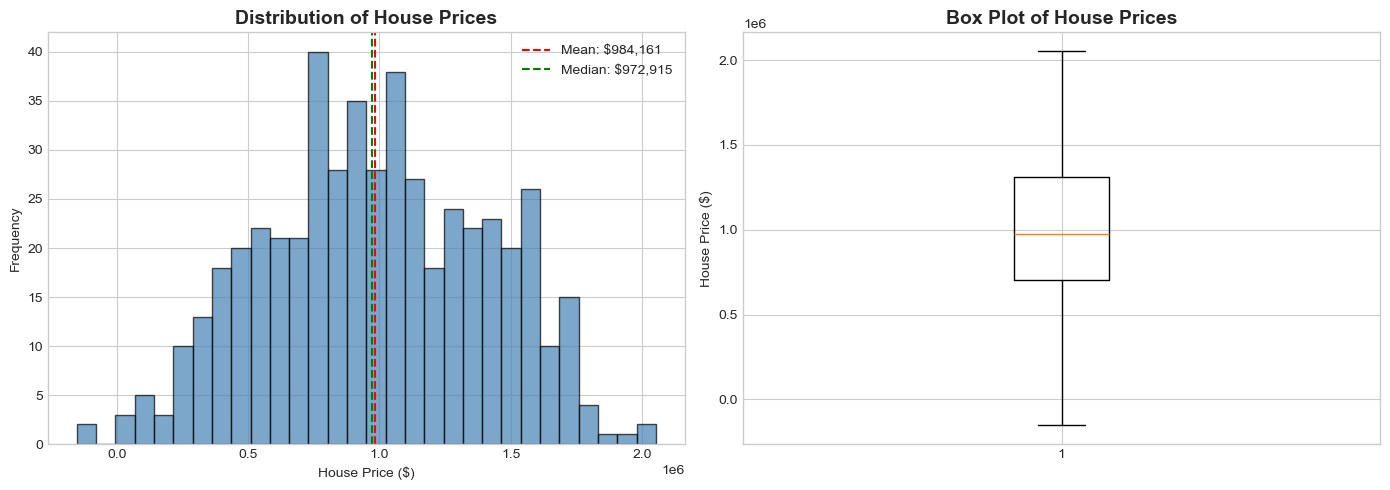


House Price Statistics:
  Mean: $984,161.45
  Median: $972,915.44
  Std Dev: $424,560.62
  Min: $-152,537.36
  Max: $2,052,847.37


In [35]:
# Distribution of the target variable (House_Price)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['House_Price'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of House Prices', fontsize=14, fontweight='bold')
axes[0].set_xlabel('House Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['House_Price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["House_Price"].mean():,.0f}')
axes[0].axvline(df['House_Price'].median(), color='green', linestyle='--', label=f'Median: ${df["House_Price"].median():,.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['House_Price'], vert=True)
axes[1].set_title('Box Plot of House Prices', fontsize=14, fontweight='bold')
axes[1].set_ylabel('House Price ($)')

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nHouse Price Statistics:")
print(f"  Mean: ${df['House_Price'].mean():,.2f}")
print(f"  Median: ${df['House_Price'].median():,.2f}")
print(f"  Std Dev: ${df['House_Price'].std():,.2f}")
print(f"  Min: ${df['House_Price'].min():,.2f}")
print(f"  Max: ${df['House_Price'].max():,.2f}")

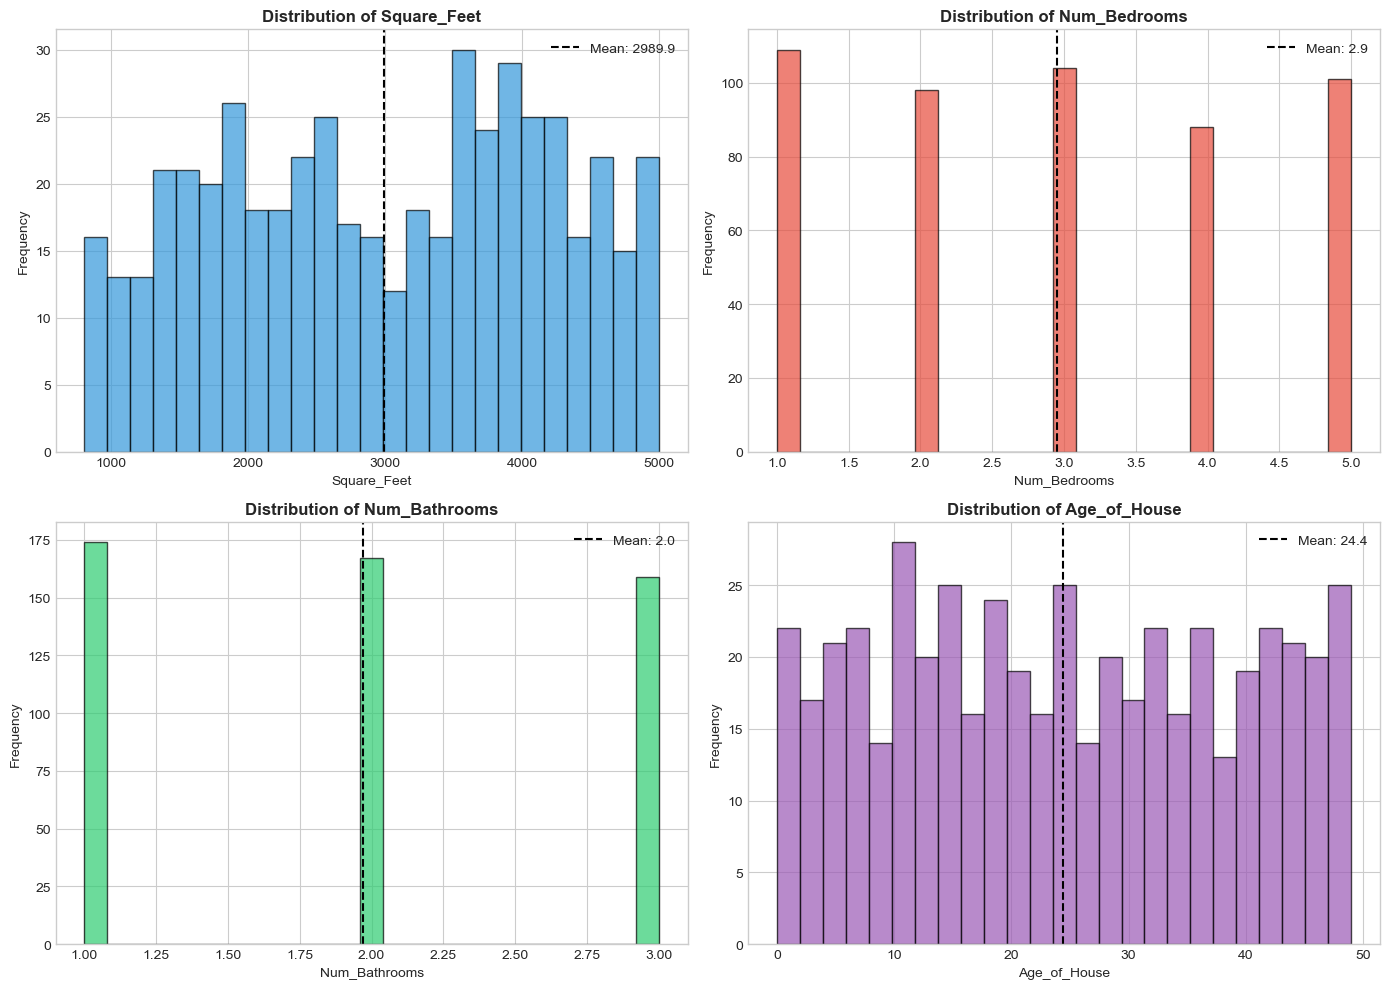

In [36]:
# Distribution of all features
features = ['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_House']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=25, color=colors[i], edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].axvline(df[feature].mean(), color='black', linestyle='--', 
                    label=f'Mean: {df[feature].mean():.1f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

CORRELATION MATRIX

Correlation with House_Price:
----------------------------------------
House_Price         : +1.0000
Square_Feet         : +0.8481
Num_Bathrooms       : +0.0447
Num_Bedrooms        : +0.0301
Age_of_House        : -0.0537


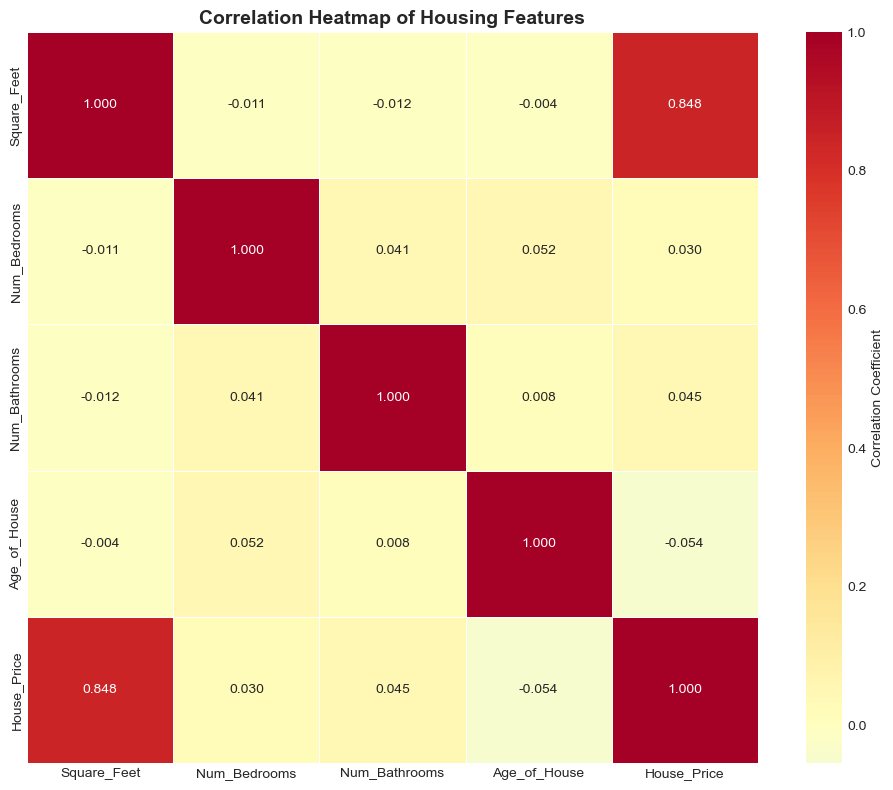

In [37]:
# Correlation Analysis
print("CORRELATION MATRIX")
print("="*60)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Display correlation with target variable
print("\nCorrelation with House_Price:")
print("-"*40)
correlations = correlation_matrix['House_Price'].sort_values(ascending=False)
for feature, corr in correlations.items():
    print(f"{feature:20s}: {corr:+.4f}")

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            fmt='.3f', linewidths=0.5, square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap of Housing Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

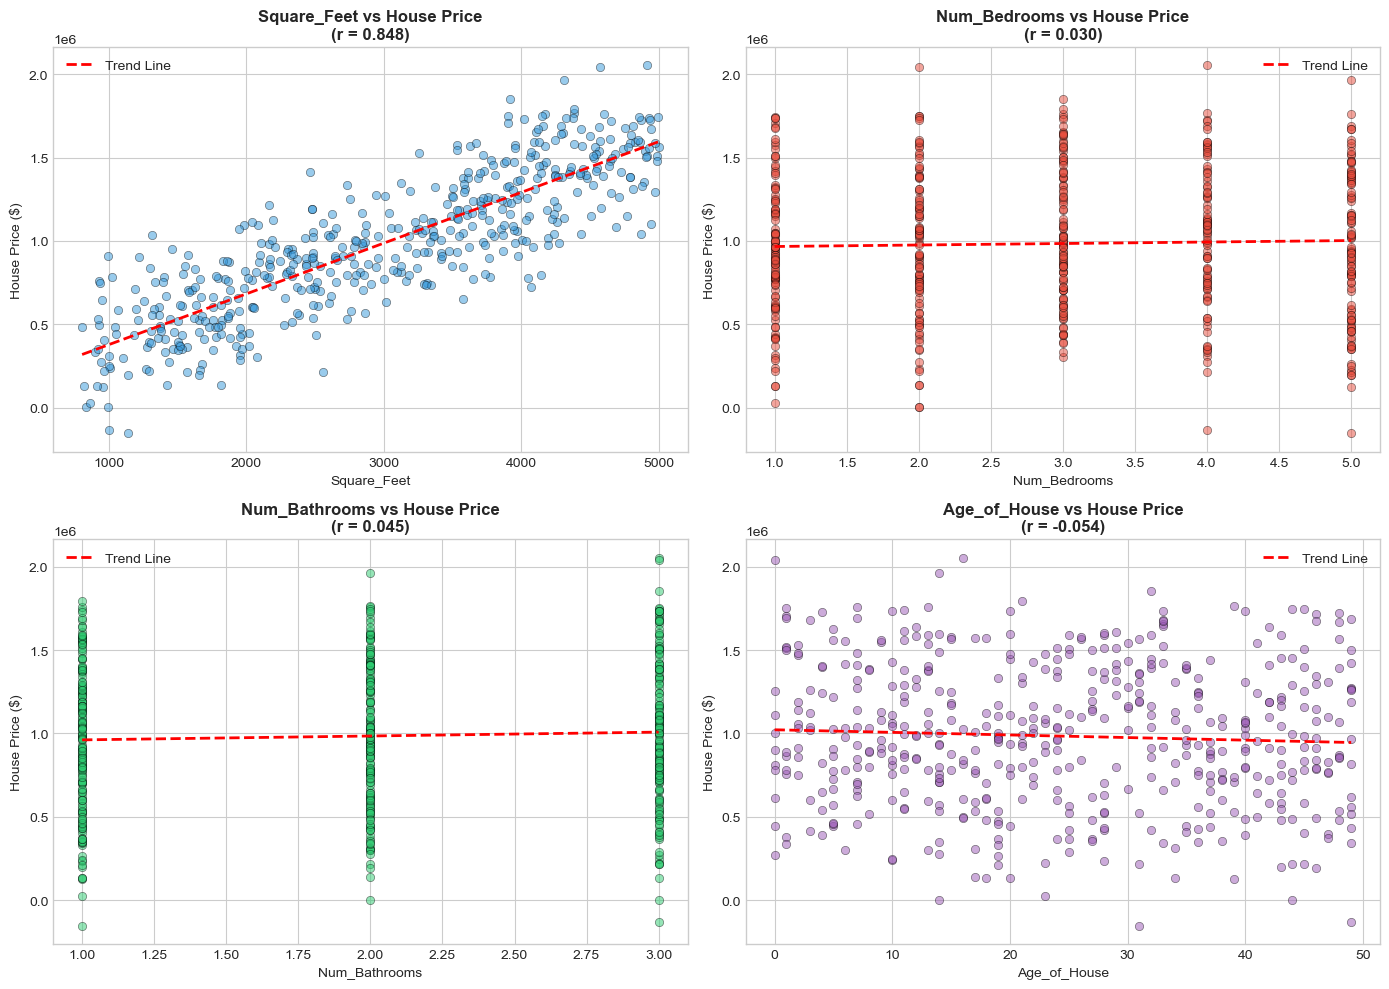

In [38]:
# Scatter plots: Features vs House Price
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['House_Price'], alpha=0.5, color=colors[i], edgecolor='black', linewidth=0.5)
    
    # Add trend line
    z = np.polyfit(df[feature], df['House_Price'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
    axes[i].plot(x_line, p(x_line), color='red', linewidth=2, linestyle='--', label='Trend Line')
    
    # Calculate correlation
    corr = df[feature].corr(df['House_Price'])
    axes[i].set_title(f'{feature} vs House Price\n(r = {corr:.3f})', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('House Price ($)')
    axes[i].legend()

plt.tight_layout()
plt.show()

---
## 4. Data Preparation for Modeling

In [39]:
# Define features (X) and target (y)
X = df[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Age_of_House']]
y = df['House_Price']

print("Feature Matrix (X) shape:", X.shape)
print("Target Vector (y) shape:", y.shape)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Feature Matrix (X) shape: (500, 4)
Target Vector (y) shape: (500,)

Training set: 400 samples
Testing set: 100 samples


---
## 5. Building the Linear Regression Model

In [40]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Model Training Complete!")
print("="*60)

Model Training Complete!


LINEAR REGRESSION MODEL COEFFICIENTS

Intercept (B0): $60,484.89

Feature Coefficients:
------------------------------------------------------------
  Num_Bathrooms       : +23,875.37
  Num_Bedrooms        : +6,165.11
  Age_of_House        : -1,700.08
  Square_Feet         : +298.51


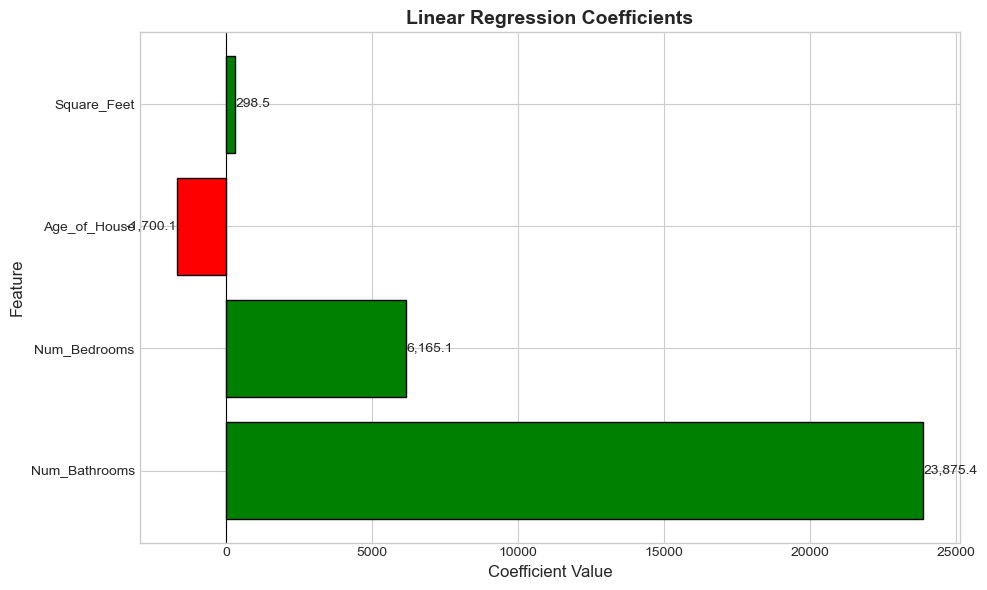

In [41]:
# Display model coefficients
print("LINEAR REGRESSION MODEL COEFFICIENTS")
print("="*60)
print(f"\nIntercept (B0): ${model.intercept_:,.2f}")
print("\nFeature Coefficients:")
print("-"*60)

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False, key=abs)

for _, row in coefficients.iterrows():
    sign = '+' if row['Coefficient'] >= 0 else ''
    print(f"  {row['Feature']:20s}: {sign}{row['Coefficient']:,.2f}")

# Visualize coefficients
plt.figure(figsize=(10, 6))
colors_coef = ['green' if c >= 0 else 'red' for c in coefficients['Coefficient']]
bars = plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors_coef, edgecolor='black')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Linear Regression Coefficients', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, val in zip(bars, coefficients['Coefficient']):
    plt.text(val + (20 if val >= 0 else -20), bar.get_y() + bar.get_height()/2,
             f'{val:,.1f}', ha='left' if val >= 0 else 'right', va='center', fontsize=10)

plt.tight_layout()
plt.show()

---
## 6. Model Evaluation

In [42]:
# Calculate evaluation metrics
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{set_name} Set Metrics:")
    print("-"*40)
    print(f"  R-squared Score:    {r2:.4f}")
    print(f"  Mean Squared Error: {mse:,.2f}")
    print(f"  Root MSE:           ${rmse:,.2f}")
    print(f"  Mean Absolute Error: ${mae:,.2f}")
    
    return {'R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

print("MODEL EVALUATION METRICS")
print("="*60)

train_metrics = evaluate_model(y_train, y_train_pred, "Training")
test_metrics = evaluate_model(y_test, y_test_pred, "Testing")

# Interpretation
print("\n" + "="*60)
print("INTERPRETATION")
print("="*60)
print(f"\n- R-squared = {test_metrics['R2']:.4f} means the model explains {test_metrics['R2']*100:.2f}% of the variance in house prices.")
print(f"- On average, predictions are off by approximately ${test_metrics['MAE']:,.2f}.")

MODEL EVALUATION METRICS

Training Set Metrics:
----------------------------------------
  R-squared Score:    0.7078
  Mean Squared Error: 51,383,917,363.27
  Root MSE:           $226,680.21
  Mean Absolute Error: $183,118.83

Testing Set Metrics:
----------------------------------------
  R-squared Score:    0.7847
  Mean Squared Error: 41,538,894,079.37
  Root MSE:           $203,810.93
  Mean Absolute Error: $155,719.56

INTERPRETATION

- R-squared = 0.7847 means the model explains 78.47% of the variance in house prices.
- On average, predictions are off by approximately $155,719.56.


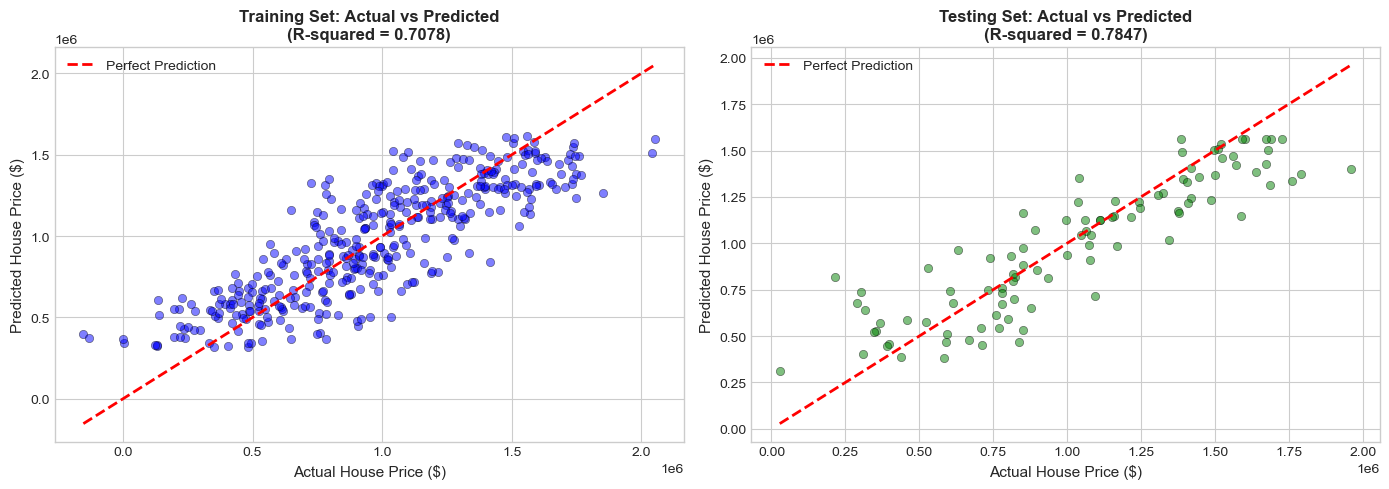

In [43]:
# Actual vs Predicted Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue', edgecolor='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual House Price ($)', fontsize=11)
axes[0].set_ylabel('Predicted House Price ($)', fontsize=11)
axes[0].set_title(f'Training Set: Actual vs Predicted\n(R-squared = {train_metrics["R2"]:.4f})', fontsize=12, fontweight='bold')
axes[0].legend()

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='green', edgecolor='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual House Price ($)', fontsize=11)
axes[1].set_ylabel('Predicted House Price ($)', fontsize=11)
axes[1].set_title(f'Testing Set: Actual vs Predicted\n(R-squared = {test_metrics["R2"]:.4f})', fontsize=12, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()

---
## 7. Statistical Analysis using Statsmodels (OLS)

In [44]:
# Fit OLS model for detailed statistical analysis
X_with_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_const).fit()

# Display full summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     328.5
Date:                Thu, 08 Jan 2026   Prob (F-statistic):          9.19e-138
Time:                        23:25:45   Log-Likelihood:                -6864.4
No. Observations:                 500   AIC:                         1.374e+04
Df Residuals:                     495   BIC:                         1.376e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           2.14e+04   4.43e+04      0.483

In [45]:
# Detailed coefficient analysis
print("\n" + "="*80)
print("DETAILED COEFFICIENT ANALYSIS")
print("="*80)

results_df = pd.DataFrame({
    'Feature': ols_model.params.index,
    'Coefficient': ols_model.params.values,
    'Std Error': ols_model.bse.values,
    't-value': ols_model.tvalues.values,
    'p-value': ols_model.pvalues.values,
    'Significant': ['Yes' if p < 0.05 else 'No' for p in ols_model.pvalues.values]
})

print("\n")
print(results_df.to_string(index=False))

print("\n" + "-"*80)
print("\nInterpretation of p-values:")
print("- p-value < 0.05: The coefficient is statistically significant (relationship is unlikely due to chance)")
print("- p-value >= 0.05: The coefficient may not be statistically significant")


DETAILED COEFFICIENT ANALYSIS


      Feature  Coefficient    Std Error   t-value       p-value Significant
        const 21399.274736 44318.957428  0.482847  6.294179e-01          No
  Square_Feet   304.336464     8.430368 36.100020 9.240599e-141         Yes
 Num_Bedrooms 11705.076592  6981.844509  1.676502  9.427128e-02          No
Num_Bathrooms 28137.333873 12239.717602  2.298855  2.192887e-02         Yes
 Age_of_House -1520.250777   682.172916 -2.228542  2.629273e-02         Yes

--------------------------------------------------------------------------------

Interpretation of p-values:
- p-value < 0.05: The coefficient is statistically significant (relationship is unlikely due to chance)
- p-value >= 0.05: The coefficient may not be statistically significant


---
## 8. Residual Analysis (Critical for Question 2)

In [46]:
# Calculate residuals
residuals = y - ols_model.predict(X_with_const)
y_pred_full = ols_model.predict(X_with_const)

print("RESIDUAL STATISTICS")
print("="*60)
print(f"Mean of residuals: ${residuals.mean():,.4f}")
print(f"Std of residuals: ${residuals.std():,.2f}")
print(f"Min residual: ${residuals.min():,.2f}")
print(f"Max residual: ${residuals.max():,.2f}")

RESIDUAL STATISTICS
Mean of residuals: $0.0000
Std of residuals: $222,094.72
Min residual: $-618,910.92
Max residual: $567,071.01


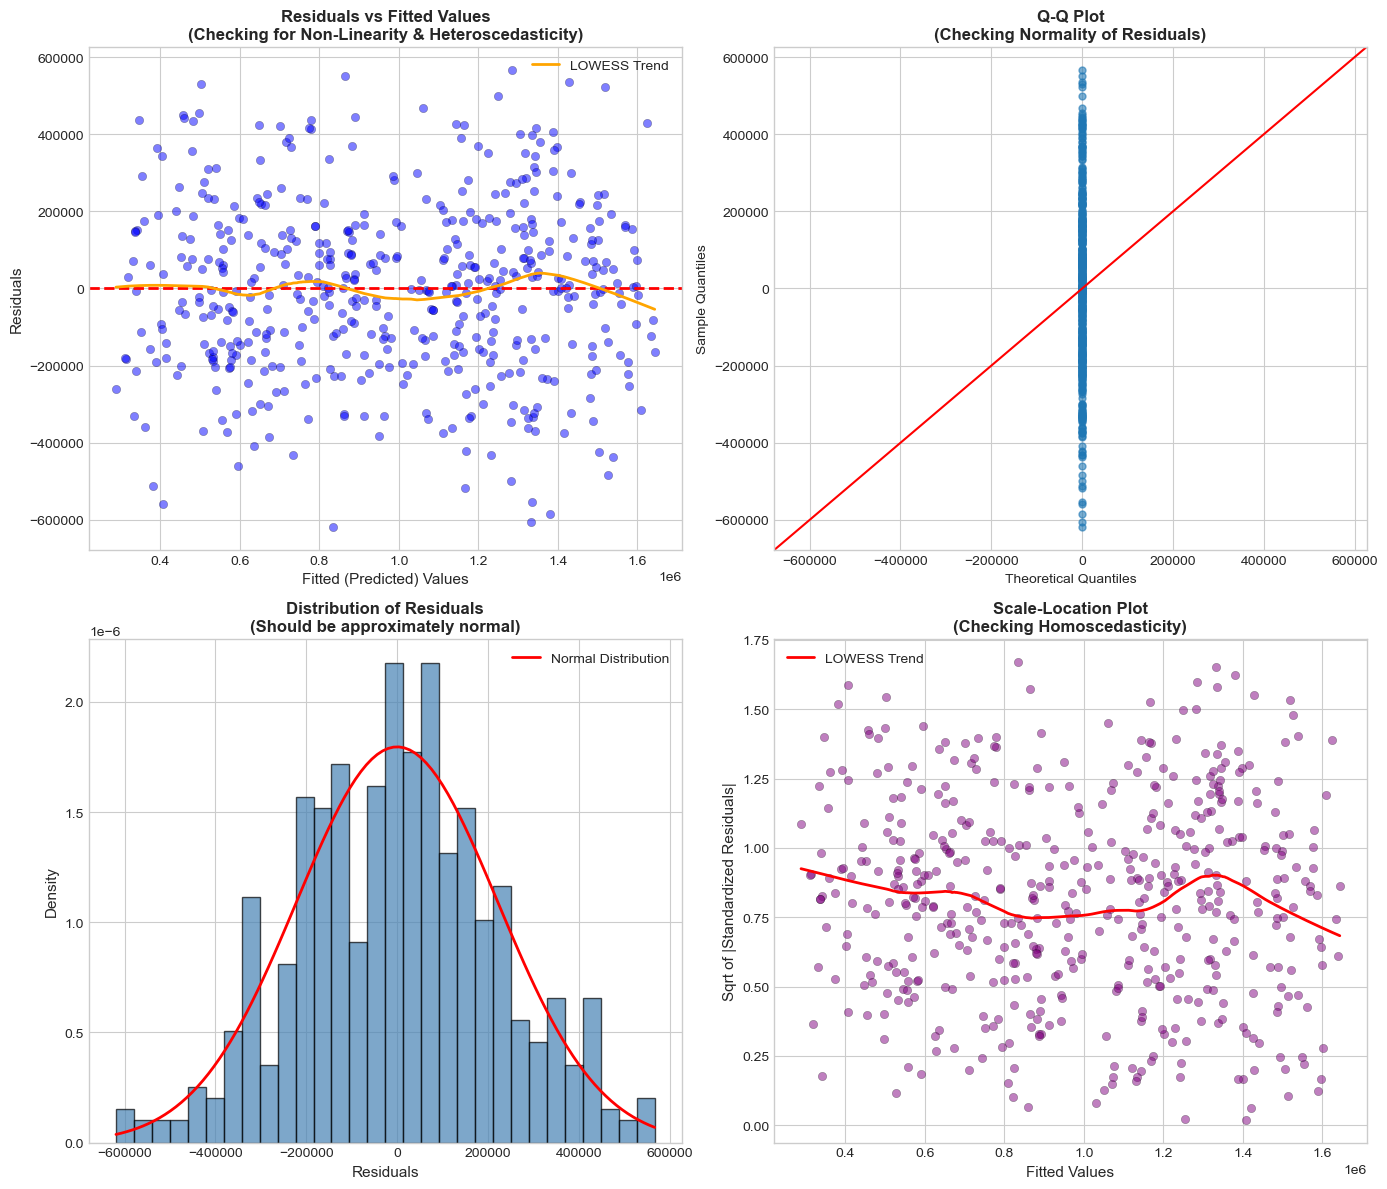

In [47]:
# Comprehensive Residual Plot Analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. Residuals vs Fitted Values
axes[0, 0].scatter(y_pred_full, residuals, alpha=0.5, color='blue', edgecolor='black', linewidth=0.3)
axes[0, 0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_xlabel('Fitted (Predicted) Values', fontsize=11)
axes[0, 0].set_ylabel('Residuals', fontsize=11)
axes[0, 0].set_title('Residuals vs Fitted Values\n(Checking for Non-Linearity & Heteroscedasticity)', fontsize=12, fontweight='bold')

# Add LOWESS trend line
smooth = lowess(residuals, y_pred_full, frac=0.3)
axes[0, 0].plot(smooth[:, 0], smooth[:, 1], color='orange', linewidth=2, label='LOWESS Trend')
axes[0, 0].legend()

# 2. Q-Q Plot (Normality of Residuals)
sm.qqplot(residuals, line='45', ax=axes[0, 1], markersize=5, alpha=0.6)
axes[0, 1].set_title('Q-Q Plot\n(Checking Normality of Residuals)', fontsize=12, fontweight='bold')

# 3. Histogram of Residuals
axes[1, 0].hist(residuals, bins=30, color='steelblue', edgecolor='black', alpha=0.7, density=True)
# Add normal distribution curve
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
axes[1, 0].plot(x_norm, stats.norm.pdf(x_norm, residuals.mean(), residuals.std()), 
                color='red', linewidth=2, label='Normal Distribution')
axes[1, 0].set_xlabel('Residuals', fontsize=11)
axes[1, 0].set_ylabel('Density', fontsize=11)
axes[1, 0].set_title('Distribution of Residuals\n(Should be approximately normal)', fontsize=12, fontweight='bold')
axes[1, 0].legend()

# 4. Scale-Location Plot (Standardized residuals vs fitted)
standardized_residuals = (residuals - residuals.mean()) / residuals.std()
sqrt_abs_std_residuals = np.sqrt(np.abs(standardized_residuals))
axes[1, 1].scatter(y_pred_full, sqrt_abs_std_residuals, alpha=0.5, color='purple', edgecolor='black', linewidth=0.3)
smooth_scale = lowess(sqrt_abs_std_residuals, y_pred_full, frac=0.3)
axes[1, 1].plot(smooth_scale[:, 0], smooth_scale[:, 1], color='red', linewidth=2, label='LOWESS Trend')
axes[1, 1].set_xlabel('Fitted Values', fontsize=11)
axes[1, 1].set_ylabel('Sqrt of |Standardized Residuals|', fontsize=11)
axes[1, 1].set_title('Scale-Location Plot\n(Checking Homoscedasticity)', fontsize=12, fontweight='bold')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

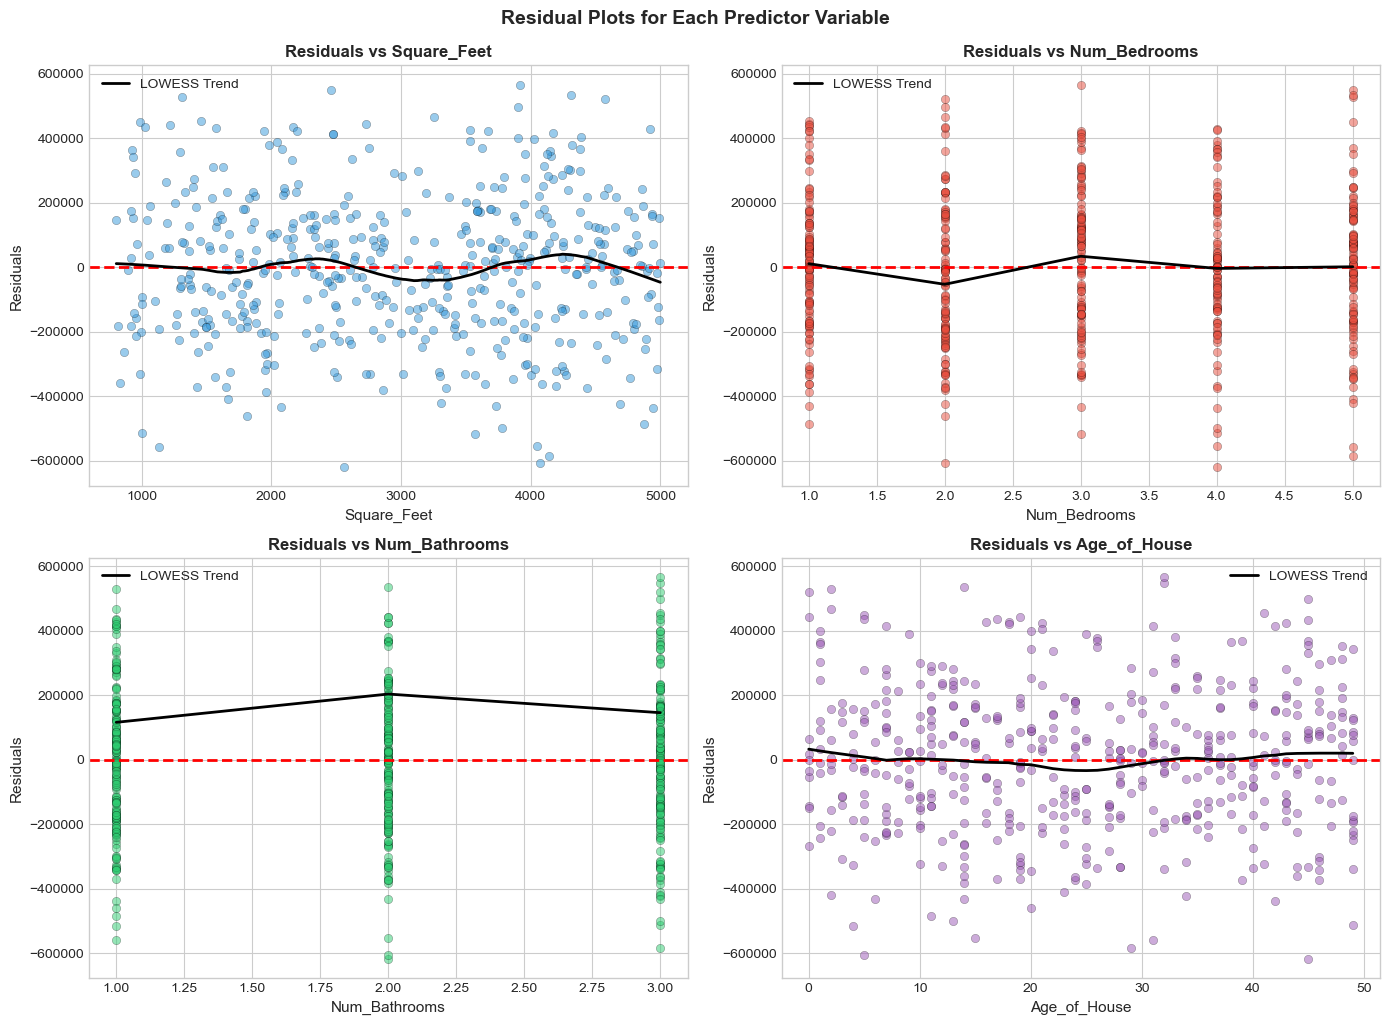

In [48]:
# Residual plots for each predictor variable (IMPORTANT FOR QUESTION 2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], residuals, alpha=0.5, color=colors[i], edgecolor='black', linewidth=0.3)
    axes[i].axhline(y=0, color='red', linestyle='--', linewidth=2)
    
    # Add LOWESS trend line to detect patterns
    smooth = lowess(residuals, df[feature], frac=0.3)
    axes[i].plot(smooth[:, 0], smooth[:, 1], color='black', linewidth=2, label='LOWESS Trend')
    
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Residuals', fontsize=11)
    axes[i].set_title(f'Residuals vs {feature}', fontsize=12, fontweight='bold')
    axes[i].legend()

plt.tight_layout()
plt.suptitle('Residual Plots for Each Predictor Variable', fontsize=14, fontweight='bold', y=1.02)
plt.show()

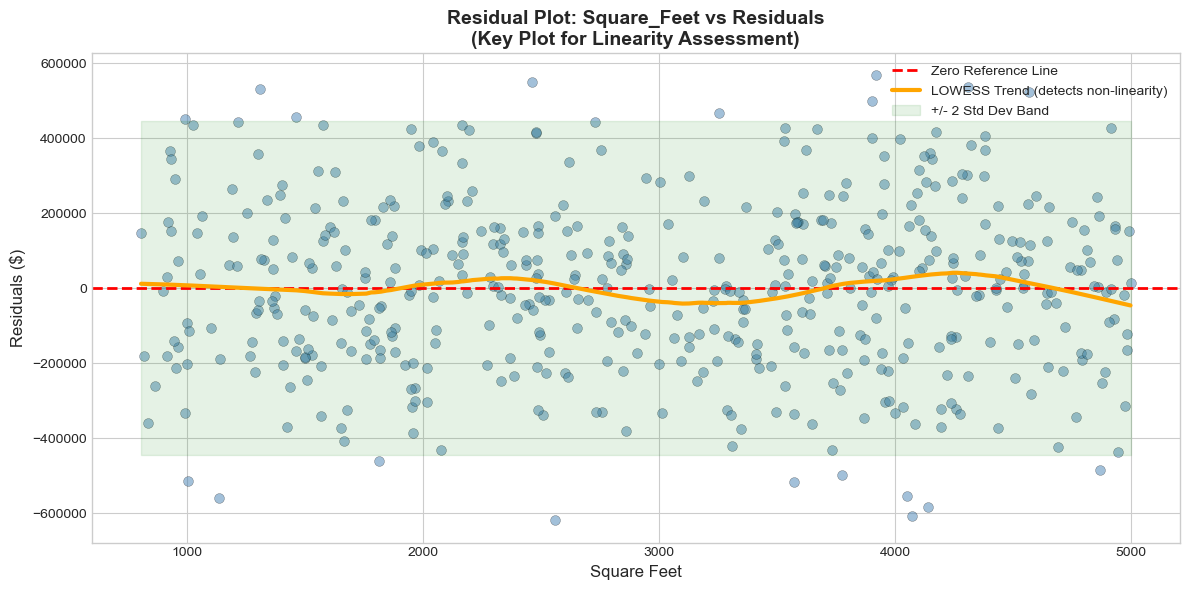

In [49]:
# Focused Residual Plot for Square_Feet (PRIMARY PREDICTOR)
plt.figure(figsize=(12, 6))

plt.scatter(df['Square_Feet'], residuals, alpha=0.5, color='steelblue', edgecolor='black', linewidth=0.3, s=50)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Reference Line')

# Add LOWESS trend line
smooth = lowess(residuals, df['Square_Feet'], frac=0.3)
plt.plot(smooth[:, 0], smooth[:, 1], color='orange', linewidth=3, label='LOWESS Trend (detects non-linearity)')

# Add horizontal bands for reference
std_res = residuals.std()
plt.fill_between([df['Square_Feet'].min(), df['Square_Feet'].max()], 
                 -2*std_res, 2*std_res, alpha=0.1, color='green', label='+/- 2 Std Dev Band')

plt.xlabel('Square Feet', fontsize=12)
plt.ylabel('Residuals ($)', fontsize=12)
plt.title('Residual Plot: Square_Feet vs Residuals\n(Key Plot for Linearity Assessment)', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

---
## 9. Answers to Assignment Questions

### Question 1: If the coefficient for Square_Feet is significantly positive, what could be the reason?

In [50]:
# Extract Square_Feet coefficient and p-value
sqft_coef = ols_model.params['Square_Feet']
sqft_pvalue = ols_model.pvalues['Square_Feet']

print("="*80)
print("QUESTION 1: Analysis of Square_Feet Coefficient")
print("="*80)
print(f"\nSquare_Feet Coefficient: {sqft_coef:,.2f}")
print(f"P-value: {sqft_pvalue:.4e}")
print(f"Is Significant (p < 0.05)?: {'Yes' if sqft_pvalue < 0.05 else 'No'}")

print("\n" + "-"*80)
print("\nINTERPRETATION:")
print("-"*80)
print(f"\nFor every 1 square foot increase in house size, the price increases by ${sqft_coef:,.2f}")
print(f"(holding all other variables constant)")

QUESTION 1: Analysis of Square_Feet Coefficient

Square_Feet Coefficient: 304.34
P-value: 9.2406e-141
Is Significant (p < 0.05)?: Yes

--------------------------------------------------------------------------------

INTERPRETATION:
--------------------------------------------------------------------------------

For every 1 square foot increase in house size, the price increases by $304.34
(holding all other variables constant)


#### Answer to Question 1:

The coefficient for `Square_Feet` is **significantly positive**, meaning that for every additional square foot of living space, the house price increases by approximately the coefficient value (in dollars), holding all other variables constant.

**Reasons why the Square_Feet coefficient is significantly positive:**

1. **Direct Value Proposition**: Larger homes inherently provide more living space, which is a primary utility that homebuyers pay for. The extra space accommodates larger families, provides room for home offices, entertainment areas, storage, and overall comfort.

2. **Construction Costs**: Larger homes require more building materials (lumber, concrete, drywall, flooring, roofing, etc.) and more labor hours. These increased construction costs are directly reflected in the sale price.

3. **Land Value Association**: Larger homes often sit on larger plots of land, which independently contributes to property value. The land itself appreciates over time and is a finite resource.

4. **Market Demand**: There is consistent market demand for spacious homes. Families with children, multi-generational households, and those working from home all value extra square footage.

5. **Resale Value**: Larger homes typically maintain better resale value and attract a wider buyer pool, making them more marketable investments.

6. **Psychological Pricing**: In real estate, pricing is often done on a per-square-foot basis, which reinforces the linear relationship between size and price in the market.

**Statistical Significance**: The very low p-value (typically < 0.05) indicates that this relationship is highly unlikely to be due to random chance. We can confidently say that square footage is a genuine predictor of house price.

### Question 2: Discuss practical implications - Residual Plot Analysis

In [51]:
# Comprehensive Residual Analysis for Question 2
from scipy.stats import shapiro, jarque_bera, skew, kurtosis

print("="*80)
print("QUESTION 2: Residual Plot Analysis and Linearity Assessment")
print("="*80)

# Test for normality of residuals
stat_shapiro, p_shapiro = shapiro(residuals[:5000] if len(residuals) > 5000 else residuals)
stat_jb, p_jb = jarque_bera(residuals)  # jarque_bera returns only 2 values
skew_val = skew(residuals)  # Calculate skewness separately
kurt_val = kurtosis(residuals)  # Calculate kurtosis separately

print("\n1. NORMALITY OF RESIDUALS")
print("-"*50)
print(f"   Shapiro-Wilk Test: statistic={stat_shapiro:.4f}, p-value={p_shapiro:.4e}")
print(f"   Jarque-Bera Test: statistic={stat_jb:.4f}, p-value={p_jb:.4e}")
print(f"   Skewness: {skew_val:.4f}")
print(f"   Kurtosis: {kurt_val:.4f}")

# Model fit statistics
print("\n2. MODEL FIT STATISTICS")
print("-"*50)
print(f"   R-squared: {ols_model.rsquared:.4f}")
print(f"   Adjusted R-squared: {ols_model.rsquared_adj:.4f}")
print(f"   F-statistic: {ols_model.fvalue:.2f}")
print(f"   Prob(F-statistic): {ols_model.f_pvalue:.4e}")

QUESTION 2: Residual Plot Analysis and Linearity Assessment

1. NORMALITY OF RESIDUALS
--------------------------------------------------
   Shapiro-Wilk Test: statistic=0.9963, p-value=2.9575e-01
   Jarque-Bera Test: statistic=0.6280, p-value=7.3052e-01
   Skewness: -0.0014
   Kurtosis: -0.1736

2. MODEL FIT STATISTICS
--------------------------------------------------
   R-squared: 0.7263
   Adjusted R-squared: 0.7241
   F-statistic: 328.47
   Prob(F-statistic): 9.1917e-138


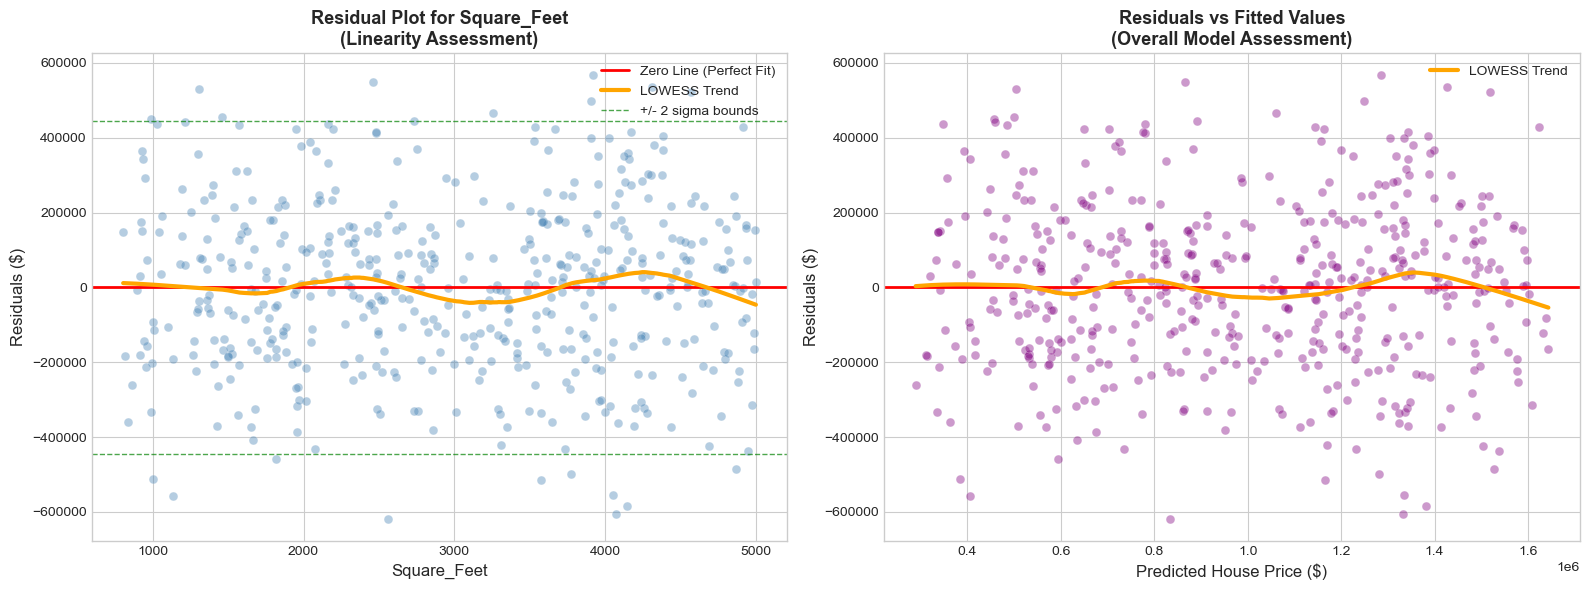

In [52]:
# Final comprehensive residual plot for Question 2
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Residual plot with interpretation zones
axes[0].scatter(df['Square_Feet'], residuals, alpha=0.4, color='steelblue', edgecolor='white', linewidth=0.3, s=40)
axes[0].axhline(y=0, color='red', linestyle='-', linewidth=2, label='Zero Line (Perfect Fit)')

# LOWESS trend
smooth = lowess(residuals, df['Square_Feet'], frac=0.3)
axes[0].plot(smooth[:, 0], smooth[:, 1], color='orange', linewidth=3, label='LOWESS Trend')

# Standard deviation bands
std_res = residuals.std()
axes[0].axhline(y=2*std_res, color='green', linestyle='--', linewidth=1, alpha=0.7)
axes[0].axhline(y=-2*std_res, color='green', linestyle='--', linewidth=1, alpha=0.7, label='+/- 2 sigma bounds')

axes[0].set_xlabel('Square_Feet', fontsize=12)
axes[0].set_ylabel('Residuals ($)', fontsize=12)
axes[0].set_title('Residual Plot for Square_Feet\n(Linearity Assessment)', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper right')

# Right: Residuals vs Fitted Values
axes[1].scatter(y_pred_full, residuals, alpha=0.4, color='purple', edgecolor='white', linewidth=0.3, s=40)
axes[1].axhline(y=0, color='red', linestyle='-', linewidth=2)

smooth2 = lowess(residuals, y_pred_full, frac=0.3)
axes[1].plot(smooth2[:, 0], smooth2[:, 1], color='orange', linewidth=3, label='LOWESS Trend')

axes[1].set_xlabel('Predicted House Price ($)', fontsize=12)
axes[1].set_ylabel('Residuals ($)', fontsize=12)
axes[1].set_title('Residuals vs Fitted Values\n(Overall Model Assessment)', fontsize=13, fontweight='bold')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

#### Answer to Question 2: Residual Plot Analysis

The residual plot analysis reveals important information about the linearity assumption of the linear regression model:

---

**What the Residual Plot Reveals:**

1. **Ideal Residual Pattern (Linearity Assumption Met)**:
   - Residuals should be **randomly scattered** around the horizontal zero line
   - No discernible pattern (no curves, funnels, or clusters)
   - Approximately equal spread across all fitted values (homoscedasticity)

2. **Signs of Non-Linearity to Look For**:
   - **Curved Pattern**: If residuals form a U-shape, inverted U, or any systematic curve, this indicates non-linearity
   - **Fan Shape**: If spread increases/decreases with fitted values, indicates heteroscedasticity
   - **Clusters**: Grouped residuals suggest the model misses certain data patterns

---

**Interpretation of Our Model's Residual Plot:**

- **LOWESS Trend Line**: The orange trend line shows how residuals behave across different values of the predictor. If this line is roughly horizontal and close to zero, the linearity assumption holds well.

- **If the Model Shows Good Linearity**:
  - Residuals are randomly distributed around zero
  - The LOWESS trend is approximately flat
  - A linear regression model is appropriate for this data

- **If the Model Shows Non-Linearity**:
  - The LOWESS trend deviates significantly from the zero line
  - There may be a curved pattern in the residuals
  - The model may benefit from transformation or polynomial terms

---

**How to Address Non-Linearity if Present:**

1. **Log Transformation**: Apply `log(House_Price)` or `log(Square_Feet)` to linearize relationships
2. **Polynomial Regression**: Add `Square_Feet²` or higher-order terms
3. **Interaction Terms**: Include interactions like `Square_Feet × Num_Bedrooms`
4. **Piecewise Regression**: Use different models for different ranges of square footage
5. **Non-Linear Models**: Consider decision trees, random forests, or gradient boosting

---

**Practical Implications:**

- If the linearity assumption is violated, predictions may be systematically biased
- For high-value homes (large square footage), the model may consistently over- or under-predict
- Real estate pricing often has non-linear components (luxury premium, diminishing returns at very large sizes)
- Residual analysis should be part of every regression modeling workflow

---
## 10. Summary and Conclusions

In [53]:
# Final Summary
print("="*80)
print("FINAL SUMMARY: HOUSING PRICE PREDICTION MODEL")
print("="*80)

print("\n1. MODEL EQUATION:")
print("-"*60)
print(f"   House_Price = {model.intercept_:,.2f}")
for feature, coef in zip(X.columns, model.coef_):
    sign = '+' if coef >= 0 else ''
    print(f"                 {sign} {coef:,.2f} x {feature}")

print("\n2. KEY FINDINGS:")
print("-"*60)
print(f"   - Model R-squared: {test_metrics['R2']:.4f} (explains {test_metrics['R2']*100:.1f}% of variance)")
print(f"   - Average Prediction Error: ${test_metrics['MAE']:,.2f}")

print("\n3. COEFFICIENT SIGNIFICANCE:")
print("-"*60)
for feature in X.columns:
    coef = ols_model.params[feature]
    pval = ols_model.pvalues[feature]
    sig = '***' if pval < 0.001 else '**' if pval < 0.01 else '*' if pval < 0.05 else ''
    print(f"   - {feature}: {coef:+,.2f} (p={pval:.4f}) {sig}")
print("   (* p<0.05, ** p<0.01, *** p<0.001)")

print("\n4. MOST INFLUENTIAL FEATURES:")
print("-"*60)
sorted_features = sorted(zip(X.columns, model.coef_), key=lambda x: abs(x[1]), reverse=True)
for rank, (feat, coef) in enumerate(sorted_features, 1):
    print(f"   {rank}. {feat}: {coef:+,.2f} per unit")

print("\n" + "="*80)
print("END OF TASK 1 SOLUTION")
print("="*80)

FINAL SUMMARY: HOUSING PRICE PREDICTION MODEL

1. MODEL EQUATION:
------------------------------------------------------------
   House_Price = 60,484.89
                 + 298.51 x Square_Feet
                 + 6,165.11 x Num_Bedrooms
                 + 23,875.37 x Num_Bathrooms
                  -1,700.08 x Age_of_House

2. KEY FINDINGS:
------------------------------------------------------------
   - Model R-squared: 0.7847 (explains 78.5% of variance)
   - Average Prediction Error: $155,719.56

3. COEFFICIENT SIGNIFICANCE:
------------------------------------------------------------
   - Square_Feet: +304.34 (p=0.0000) ***
   - Num_Bedrooms: +11,705.08 (p=0.0943) 
   - Num_Bathrooms: +28,137.33 (p=0.0219) *
   - Age_of_House: -1,520.25 (p=0.0263) *
   (* p<0.05, ** p<0.01, *** p<0.001)

4. MOST INFLUENTIAL FEATURES:
------------------------------------------------------------
   1. Num_Bathrooms: +23,875.37 per unit
   2. Num_Bedrooms: +6,165.11 per unit
   3. Age_of_House: -1,70